In [125]:
import openmc
import matplotlib as plt

In [ ]:
#cat tallies.out
#openmc
#python generate_mc_model.py
#rm summary.h5
#git status
#git add generate_mc_model.py
#git commit -m "(message)"
#git push

In [ ]:
#introduction, methods, results, conclusion
#create figures for shannon entropy, create tables for flux and fission with openmc and random ray, create model of the cells
#report template in report folder

In [140]:
sp_mc = openmc.StatePoint('statepoint.300mc.h5')
sp_rr = openmc.StatePoint('statepoint.300rr.h5')

## Shannon entropy

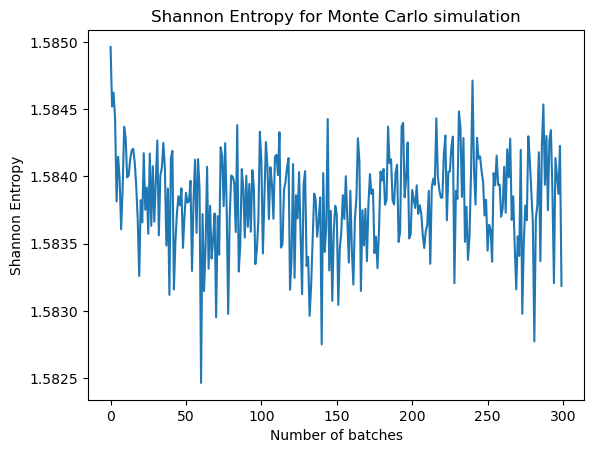

In [49]:
plt.plot(sp_rr.entropy)
plt.xlabel('Number of batches')
plt.ylabel('Shannon Entropy')
plt.title('Shannon Entropy for Monte Carlo simulation')
plt.savefig('shannon_entropy_mc.png')

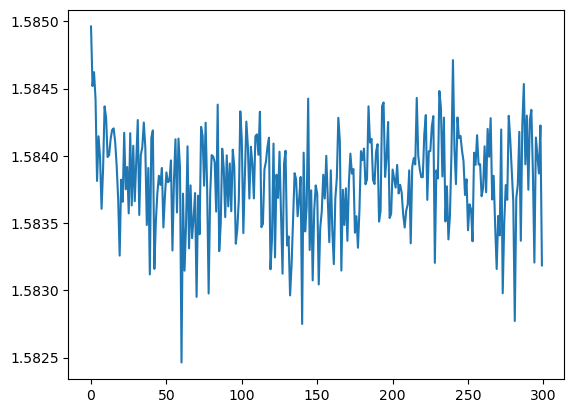

In [50]:
## TODO: Add axis labels, title, and save the figure
plt.plot(sp_rr.entropy)

## Tally data

In [110]:
# OpenMC

In [67]:
mc_fuel_tally = sp_mc.get_tally(id=1, scores=['flux', 'nu-fission'])
mc_fuel_flux = mc_fuel_tally.get_slice(scores=['flux'])
mc_fuel_nu_fission = mc_fuel_tally.get_slice(scores=['nu-fission'])

In [84]:
for i in mc_fuel_tally.get_filter_indices():
    print(f'MC flux in fuel pin {i}: ', mc_fuel_flux.mean[i].flatten()[0])

MC flux in fuel pin 0:  4.910260129968607
MC flux in fuel pin 1:  4.960209548808175
MC flux in fuel pin 2:  4.964827815824708


In [116]:
## TODO: 
## 1. Print out the nu-fission in the fuel [X]
## 2. Print out the flux in the water distribcells (hint: use id=2) [X]
## 3. Print out the flux in the empty tally (hint: use id=3) [X]
## 4. Repeat this process for the random ray statepoint [X]

In [95]:
for i in mc_fuel_tally.get_filter_indices():
    print(f'MC nu-fission in fuel pin {i}: ', mc_fuel_nu_fission.mean[i].flatten()[0])

MC nu-fission in fuel pin 0:  0.41199511613729056
MC nu-fission in fuel pin 1:  0.46264423366178264
MC nu-fission in fuel pin 2:  0.46379699905661836


In [96]:
mc_water_tally = sp_mc.get_tally(id=2, scores=['flux'])
mc_water_flux = mc_water_tally.get_slice(scores=['flux'])

In [97]:
for i in mc_water_tally.get_filter_indices():
    print(f'MC flux in water cell {i}: ', mc_water_flux.mean[i].flatten()[0])

MC flux in water cell 0:  3.611650606578616
MC flux in water cell 1:  3.647786149475031
MC flux in water cell 2:  3.647848943475063


In [98]:
mc_empty_tally = sp_mc.get_tally(id=3, scores=['flux'])
mc_empty_flux = mc_empty_tally.get_slice(scores=['flux'])

In [99]:
for i in mc_empty_tally.get_filter_indices():
    print(f'MC flux in empty cell {i}: ', mc_empty_flux.mean[i].flatten()[0])

MC flux in empty cell 0:  8.875143767699456


In [111]:
# Random Ray

In [141]:
rr_fuel_tally = sp_rr.get_tally(id=1, scores=['flux', 'nu-fission'])
rr_fuel_flux = rr_fuel_tally.get_slice(scores=['flux'])
rr_fuel_nu_fission = rr_fuel_tally.get_slice(scores=['nu-fission'])

In [142]:
for i in rr_fuel_tally.get_filter_indices():
    print(f'RR flux in fuel pin {i}: ', rr_fuel_flux.mean[i].flatten()[0])

RR flux in fuel pin 0:  14.295516769009524
RR flux in fuel pin 1:  14.36335960017646
RR flux in fuel pin 2:  14.381507535181992


In [143]:
for i in rr_fuel_tally.get_filter_indices():
    print(f'RR nu_fission in fuel pin {i}: ', rr_fuel_nu_fission.mean[i].flatten()[0])

RR nu_fission in fuel pin 0:  1.216291411114386
RR nu_fission in fuel pin 1:  1.3188129013332384
RR nu_fission in fuel pin 2:  1.3182774077961894


In [104]:
rr_water_tally = sp_rr.get_tally(id=2, scores=['flux'])
rr_water_flux = rr_water_tally.get_slice(scores=['flux'])

In [106]:
for i in rr_water_tally.get_filter_indices():
    print(f'RR flux in water cell {i}: ', rr_water_flux.mean[i].flatten()[0])

RR flux in water cell 0:  10.488337426854377
RR flux in water cell 1:  10.51114733851884
RR flux in water cell 2:  10.538819172610374


In [113]:
rr_empty_tally = sp_rr.get_tally(id=3, scores=['flux'])
rr_empty_flux = rr_empty_tally.get_slice(scores=['flux'])

In [115]:
for i in rr_empty_tally.get_filter_indices():
    print(f'RR flux in empty cell {i}: ', rr_empty_flux.mean[i].flatten()[0])

RR flux in empty cell 0:  24.960239679303392


In [135]:
sp_mc.keff

1.3395572341111284+/-0.000895851655388597

In [136]:
sp_rr.keff

1.3400134010326707+/-0.000989429088682935